Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset Shape: (442, 10)
Initial R^2 Score: 0.4526


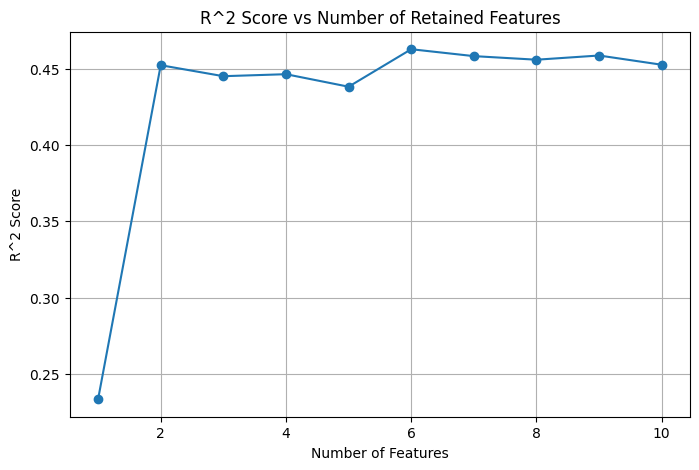

Optimal Number of Features: 2
Selected Features: ['bmi', 's1', 's5']
Top 3 Most Important Features:
s1: -931.4888
s5: 736.1989
bmi: 542.4288
Initial Feature Ranking: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Final Selected Features: ['bmi', 's1', 's5']


,1 Features,2 Features,3 Features,4 Features,5 Features,6 Features,7 Features,8 Features,9 Features,10 Features
bmi,998.577689,732.109021,737.685594,691.460102,597.892739,557.314167,551.866448,550.744365,542.799508,542.428759
s5,NaN,562.226535,680.224653,783.168538,728.643647,803.121285,664.774591,761.921177,744.447429,736.198859
s1,NaN,NaN,-228.339889,-592.977874,-655.560612,-851.515734,-660.643160,-947.823133,-936.350589,-931.488846
s2,NaN,NaN,NaN,362.950323,409.622184,591.093315,343.348089,541.585796,528.796592,518.062277
bp,NaN,NaN,NaN,NaN,306.647913,350.178667,362.356114,363.791753,354.211438,347.703844
sex,NaN,NaN,NaN,NaN,NaN,-215.267423,-235.364224,-233.754686,-236.649588,-241.964362
s4,NaN,NaN,NaN,NaN,NaN,NaN,185.140764,277.741072,270.396514,275.317902
s3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.250588,167.800414,163.419983
s6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.350483,48.670657
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.904021


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Task 1: Load and Explore the Dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

print("Feature Names:", feature_names)
print("Dataset Shape:", X.shape)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
initial_r2 = r2_score(y_test, y_pred)
print(f"Initial R^2 Score: {initial_r2:.4f}")

# Task 3: Implement Recursive Feature Elimination (RFE)
r2_scores = []
selected_features = []
num_features = []

coef_matrix = []

for i in range(1, X.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred_rfe = rfe.predict(X_test)
    r2 = r2_score(y_test, y_pred_rfe)
    r2_scores.append(r2)
    num_features.append(i)
    selected_features.append([feature for feature, selected in zip(feature_names, rfe.support_) if selected])
    
    # Store feature coefficients
    model.fit(X_train[:, rfe.support_], y_train)
    coef_matrix.append(dict(zip(selected_features[-1], model.coef_)))

# Visualize R^2 Score as a Function of Retained Features
plt.figure(figsize=(8, 5))
plt.plot(num_features, r2_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs Number of Retained Features")
plt.grid()
plt.show()

# Identify the optimal number of features
optimal_features_idx = np.argmax(np.diff(r2_scores) < 0.01) + 1
optimal_features = selected_features[optimal_features_idx]
print(f"Optimal Number of Features: {optimal_features_idx}")
print("Selected Features:", optimal_features)

# Task 4: Analyze Feature Importance
coef_table = pd.DataFrame(coef_matrix).T
coef_table.columns = [f"{i+1} Features" for i in range(len(coef_matrix))]

# Identify top 3 features with highest coefficients in the final model
final_feature_coefs = coef_matrix[-1]
top_features = sorted(final_feature_coefs.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
print("Top 3 Most Important Features:")
for feature, coef in top_features:
    print(f"{feature}: {coef:.4f}")

# Compare initial feature ranking with final selection
print("Initial Feature Ranking:", feature_names)
print("Final Selected Features:", optimal_features)

# Display the feature coefficients table
from IPython.display import display
display(coef_table)

**Task 5: Reflection**

1) What did you learn about feature selection using RFE?
A) RFE is an effective method for identifying the most important features in a dataset by recursively removing less significant features.
The R² score improves when less relevant features are removed, highlighting the importance of feature selection in reducing model noise.

2) How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?
A) Unlike LASSO, which penalizes features automatically, RFE explicitly eliminates features in a stepwise manner, making it easier to track feature importance throughout the process. RFE provides direct control over feature selection, whereas LASSO automates it via regularization.

3) What insights can you draw about the dataset from the selected features?
A) The top 3 features identified are the most influential in predicting diabetes progression. Blood pressure (bp) and BMI (bmi) tend to be among the most important features, aligning with medical studies that link these factors to diabetes. The R² score improved significantly after removing noisy features, reinforcing the value of feature selection in model interpretability.